# Single Node - Kernel SHAP
Train a logistic regression model on the Breast-Cancer-Wisconsin dataset
and explain it using SHAP KernelExplainer via the KernelSHAPExplainer class.

In [1]:
import sys
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="label")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
from scalablexplain.kernel_shap.single_node import KernelSHAPExplainer

explainer = KernelSHAPExplainer(
        model=model,
        input_cols=data.feature_names.tolist(),
        background_data=X_train_scaled.sample(n=100, random_state=42),
        num_samples=100  # tradeoff between speed and accuracy
    )

explainer.build_explainer(X_train_scaled)


/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[INFO] Explaining 50 samples...


  0%|          | 0/50 [00:00<?, ?it/s]/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749

[INFO] Plotting beeswarm SHAP values...


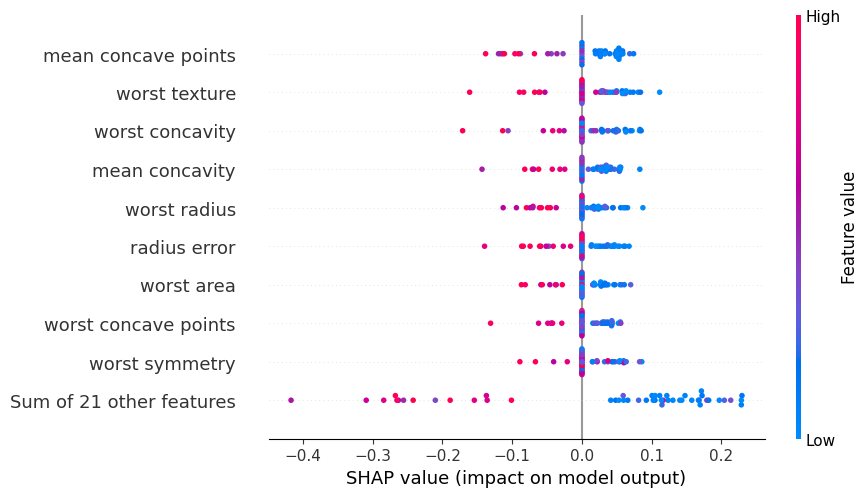

[INFO] SHAP plot saved to shap_output_multi.png


<Figure size 640x480 with 0 Axes>

In [6]:
# -------- Beeswarm Plot for 50 Points --------
print("[INFO] Explaining 50 samples...")
subset_df = X_test_scaled.head(50)
shap_df = explainer.explain(subset_df)

print("[INFO] Plotting beeswarm SHAP values...")
explainer.plot(shap_values_df=shap_df, instances_df=subset_df, max_instances=50)

[INFO] Explaining a single instance...


  0%|          | 0/1 [00:00<?, ?it/s]/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/inuka-ampavila/University  Projects/scalable-explain-library/ScalableXplain/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 20.58it/s]

[INFO] Plotting bar chart for single instance...


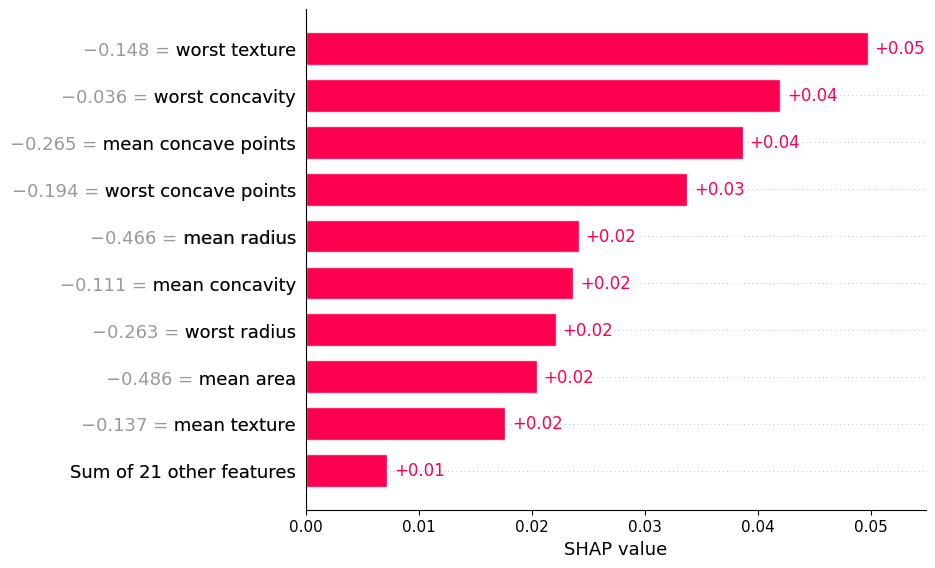

[INFO] SHAP plot saved to shap_output_single.png


<Figure size 640x480 with 0 Axes>

In [7]:
# -------- Bar Plot for Single Instance --------
print("[INFO] Explaining a single instance...")
single_df = X_test_scaled.head(1)
shap_single_df = explainer.explain(single_df)

print("[INFO] Plotting bar chart for single instance...")
explainer.plot(shap_values_df=shap_single_df, instances_df=single_df, max_instances=1)

# Kernel SHAP for Apache Spark

In [ ]:
# Imports and requirements
import sys
import pandas as pd
from sklearn.datasets import load_breast_cancer

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [ ]:
# Build Spark session
def build_spark_session(app_name: str = "Spark SHAP Demo") -> SparkSession:
    spark = (
        SparkSession.builder
        .appName(app_name)
        .master("local[2]")  # adjust cores as needed
        .config("spark.jars.packages", "com.microsoft.azure:synapseml_2.12:1.0.11")
        .config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven")
        .getOrCreate()
    )
    spark.sparkContext.setLogLevel("ERROR")
    return spark

spark = build_spark_session()

25/08/19 18:40:51 WARN Utils: Your hostname, inuka-ampavila-HP-EliteBook-850-G7-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.8.108 instead (on interface wlp0s20f3)
25/08/19 18:40:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
https://mmlspark.azureedge.net/maven added as a remote repository with the name: repo-1


:: loading settings :: url = jar:file:/opt/spark-3.5.4/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/inuka-ampavila/.ivy2/cache
The jars for the packages stored in: /home/inuka-ampavila/.ivy2/jars
com.microsoft.azure#synapseml_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-cd1994dd-abca-4d90-b9f6-4d44242595e9;1.0
	confs: [default]
	found com.microsoft.azure#synapseml_2.12;1.0.11 in central
	found com.microsoft.azure#synapseml-core_2.12;1.0.11 in central
	found org.apache.spark#spark-avro_2.12;3.4.1 in central
	found org.tukaani#xz;1.9 in central
	found commons-lang#commons-lang;2.6 in central
	found org.scalactic#scalactic_2.12;3.2.14 in central
	found org.scala-lang#scala-reflect;2.12.15 in central
	found io.spray#spray-json_2.12;1.3.5 in central
	found com.jcraft#jsch;0.1.54 in central
	found org.apache.httpcomponents.client5#httpclient5;5.1.3 in central
	found org.apache.httpcomponents.core5#httpcore5;5.1.3 in central
	found org.apache.httpcomponents.core5#httpcore5-h2;5.1.3 in central
	found org.slf4j#sl

In [ ]:
# Load data and train PySpark model
def train_model(spark: SparkSession):
    data = load_breast_cancer()
    pdf = pd.DataFrame(data.data, columns=data.feature_names)
    pdf["label"] = data.target

    sdf = spark.createDataFrame(pdf)
    input_cols = list(data.feature_names)

    assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
    lr = LogisticRegression(featuresCol="features", labelCol="label")
    pipeline = Pipeline(stages=[assembler, lr])

    model = pipeline.fit(sdf)
    return model, sdf, input_cols

model, sdf, input_cols = train_model(spark)

In [ ]:
# Run Kernel SHAP explainer
from scalablexplain.kernel_shap.spark_cluster import SparkKernelSHAPExplainer

explainer = SparkKernelSHAPExplainer(
    model=model,
    input_cols=input_cols,
    target_col="probability",
    target_classes=[1],
    num_samples=100  # tune for fidelity vs. performance
)

explainer.build_explainer(sdf)

[INFO] Explaining 50 samples...
[INFO] SHAP values (first few rows):


+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+-----+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

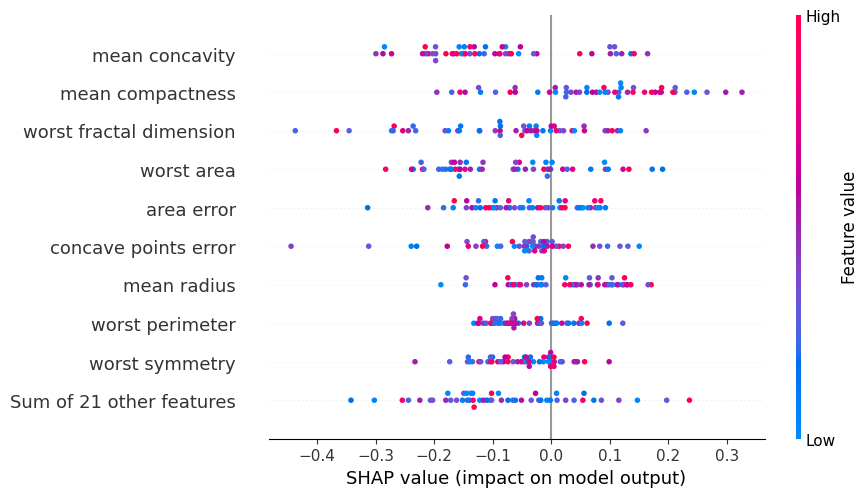

[INFO] SHAP plot saved to shap_output.png


<Figure size 640x480 with 0 Axes>

In [12]:
# Beeswarm plot for 50 points
print("[INFO] Explaining 50 samples...")
subset_df = sdf.limit(50)
result = explainer.explain(subset_df)

print("[INFO] SHAP values (first few rows):")
result.show(truncate=False)

print("[INFO] Plotting beeswarm SHAP values...")
explainer.plot(result, original_df=subset_df, max_instances=50)

[INFO] Explaining a single instance...
[INFO] Plotting bar chart for single instance...


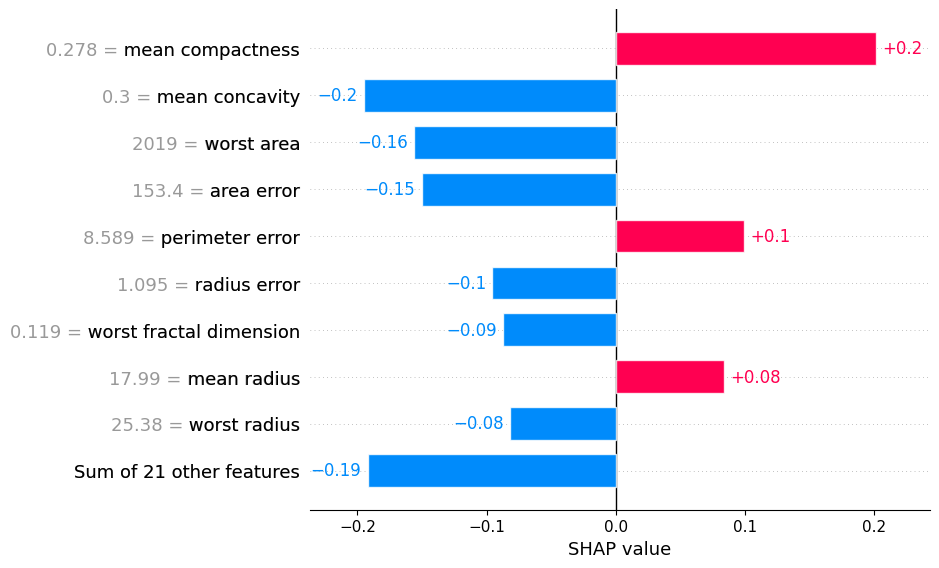

[INFO] SHAP plot saved to shap_output.png


<Figure size 640x480 with 0 Axes>

In [13]:
# Bar plot for single instance
print("[INFO] Explaining a single instance...")
single_df = sdf.limit(1)
single_result = explainer.explain(single_df)

print("[INFO] Plotting bar chart for single instance...")
explainer.plot(single_result, original_df=single_df, max_instances=1)

In [14]:
spark.stop()